In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [ ]:
ev = pd.read_csv('/content/final_dataset.csv')
ev

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0
5,5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,18.0
6,6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,179.0
7,7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,8.0
8,8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,78.0
9,9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,62.0


In [ ]:
ev.describe()

,Unnamed: 0,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,24.000000
mean,15.500000,8829.437500,20224.562500,822.96875,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,57.666667
std,9.380832,15027.420445,49311.798762,1661.50339,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,69.800752
min,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,7.750000,68.500000,31.500000,13.75000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,7.750000
50%,15.500000,1984.500000,1992.000000,131.50000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,25.000000
75%,23.250000,10306.500000,17007.250000,638.50000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,80.250000
max,31.000000,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,265.000000


In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     float64
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     float64
 6   Public Service Vehicle          32 non-null     float64
 7   Special Category Vehicles       32 non-null     float64
 8   Ambulance/Hearses               32 non-null     float64
 9   Construction Equipment Vehicle  32 non-null     float64
 10  Other                           32 non-null     float64
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations         24 non

In [ ]:
ev.drop(columns=['Unnamed: 0'], inplace=True)
ev

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,18.0
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,179.0
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,8.0
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,78.0
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,62.0


In [ ]:
#treating null values
ev.fillna(0, inplace=True) #the states with NaN electric charging stations are small in size, and with little to no chances of having charging stations

In [ ]:
ev

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,0.0
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,0.0
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,18.0
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,179.0
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,8.0
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,78.0
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,62.0


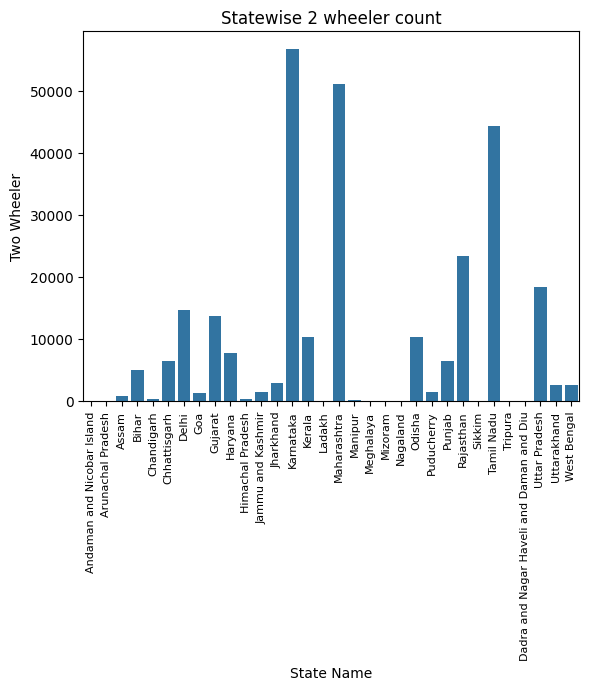

In [ ]:
sns.barplot(x=ev['State Name'], y=ev['Two Wheeler'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise 2 wheeler count')
plt.show()

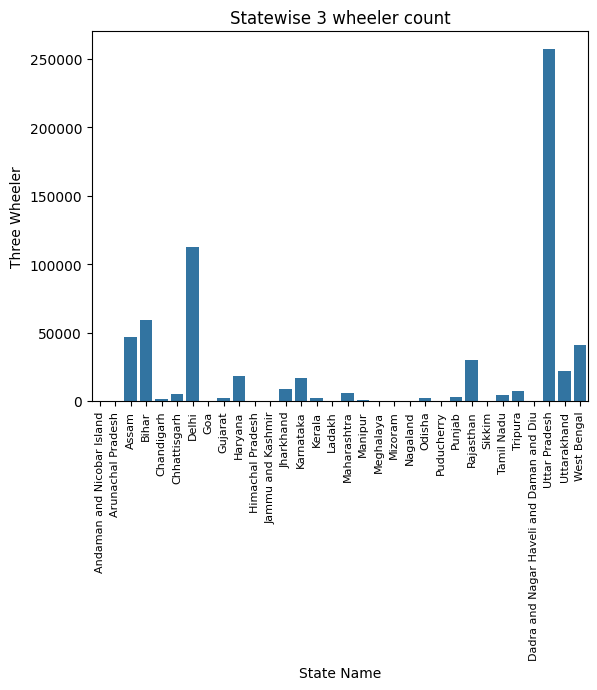

In [ ]:
sns.barplot(x=ev['State Name'], y=ev['Three Wheeler'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise 3 wheeler count')
plt.show()

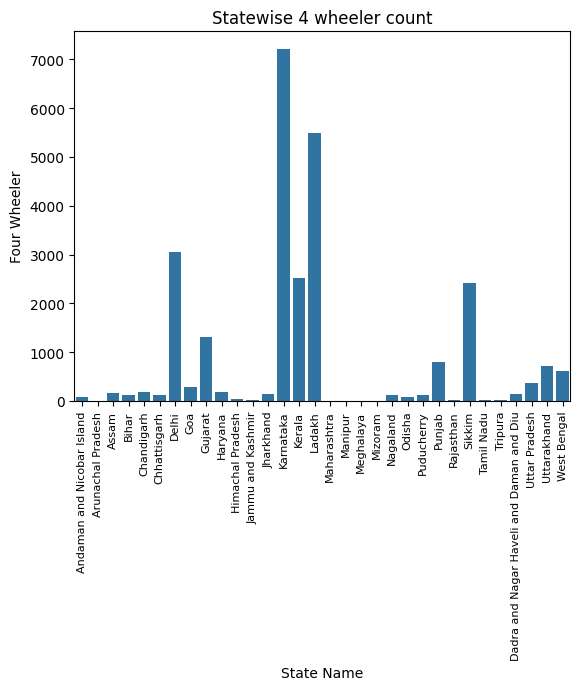

In [ ]:
sns.barplot(x=ev['State Name'], y=ev['Four Wheeler'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise 4 wheeler count')
plt.show()

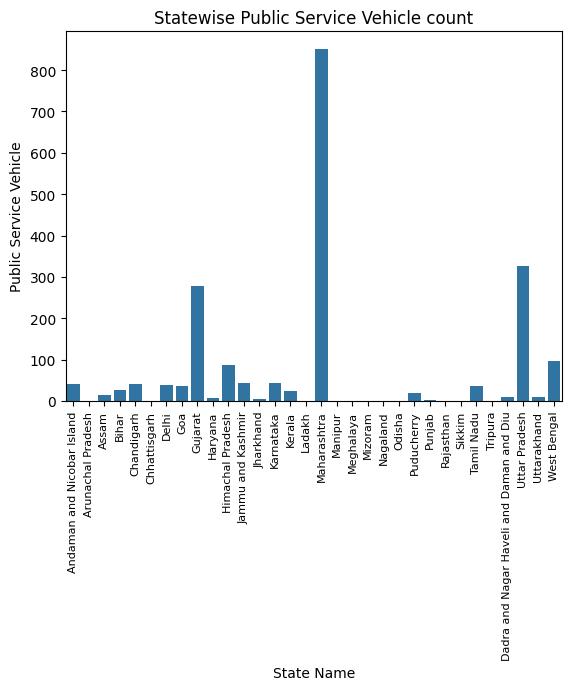

In [ ]:
sns.barplot(x=ev['State Name'], y=ev['Public Service Vehicle'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise Public Service Vehicle count')
plt.show()

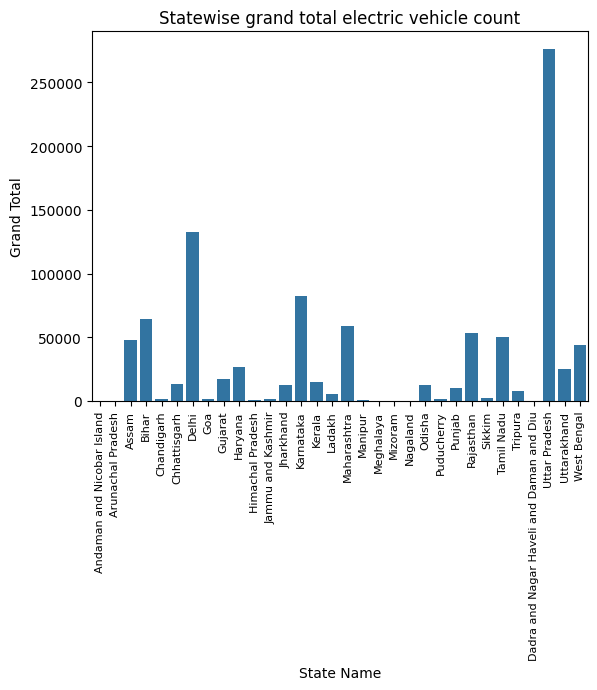

In [ ]:

sns.barplot(x=ev['State Name'], y=ev['Grand Total'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise grand total electric vehicle count')
plt.show()

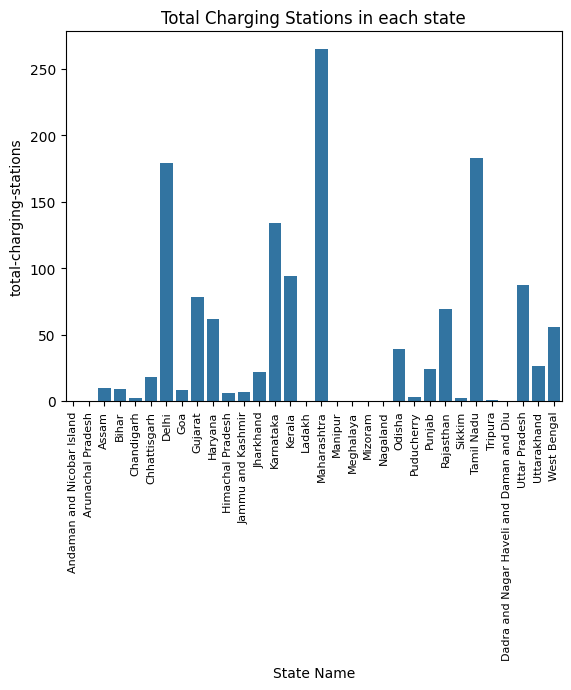

In [ ]:
sns.barplot(x=ev['State Name'], y=ev['total-charging-stations'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Total Charging Stations in each state')
plt.show()

In [ ]:
# dropping the state column for numeric columns
numeric_data= ev.drop(columns=['State Name','Grand Total'])

In [ ]:
# scaling data
scale=StandardScaler()
scaled_data=scale.fit_transform(numeric_data)

#PCA

In [ ]:
# performing PCA on the scaled dataset
pca = PCA()
pca.fit(scaled_data)

# Step 3: Transform the entire dataset using PCA
pca_transformed_data2 = pca.transform(scaled_data)

# Create a DataFrame for the PCA-transformed data
pca_statewise = pd.DataFrame(pca_transformed_data2, index=ev['State Name'], columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])


In [ ]:
# sorting factor loadings to determine states with maximum impact
pca_statewise['PC1'].sort_values(ascending=False)

,PC1
State Name,
Maharashtra,5.736724
Karnataka,5.230615
Delhi,3.369652
Tamil Nadu,2.537581
Uttar Pradesh,1.689506
Gujarat,1.143952
West Bengal,1.009843
Kerala,0.907463
Rajasthan,0.801798


In [ ]:
data=pca_statewise.reset_index()
data=data.drop(columns=['State Name'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.198648,-0.241693,-0.108356,-0.028584,0.140126,0.235509,-0.292664,-0.027118,0.028190,-0.157080
1,-1.303834,-0.210112,-0.000940,-0.024813,0.140560,0.255142,-0.167353,-0.145550,0.078678,-0.059791
2,-0.978251,-0.322635,-0.117204,0.641572,-0.312535,-0.082041,0.112388,-0.051384,0.048420,-0.024449
3,-0.776192,-0.316769,-0.191028,0.817974,-0.392208,-0.094001,0.203963,0.020802,0.279928,-0.047572
4,-1.158901,-0.249847,-0.086355,-0.026257,0.118516,0.221526,-0.270201,0.017198,0.015651,-0.128218
5,-0.400717,6.230775,0.344621,0.089936,-0.229223,-1.874395,-1.015762,0.016588,0.095249,0.062750
6,3.369652,-0.640086,1.885132,1.153908,-2.307448,0.265842,-0.790213,-1.682700,-0.685797,0.094314
7,-1.061705,-0.210784,-0.055227,-0.082277,0.108134,0.260258,-0.222799,0.034465,-0.001004,-0.073884
8,1.143952,-0.122557,-3.215536,-3.733628,-2.499487,-0.812323,0.864411,-0.385968,0.004176,-0.034762
9,-0.282790,0.112492,-0.043550,0.258762,-0.031776,0.534884,0.144649,-0.216466,-0.113248,0.310614


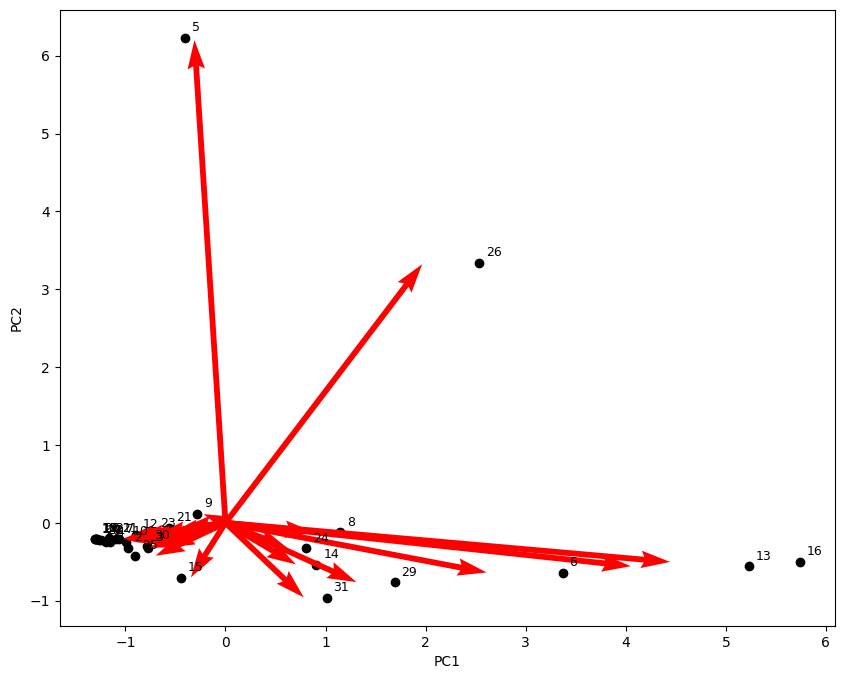

In [ ]:
# plotting the projected data points
plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], color='black', alpha=1)

# adding arrows in the data
for i in range(len(data)):
    plt.quiver(0, 0, data.iloc[i, 0], data.iloc[i, 1], color='red', label=str(i), scale=10)
    plt.annotate(str(i), (data.iloc[i, 0], data.iloc[i, 1]), textcoords='offset points', xytext=(5,5), color='black', size=9)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#Clustering

In [ ]:
# defining lists to store values
inertia=[]
cluster_result=[] #k_result
silhouette_scores={}

# initializing variables to store results
best_cluster_num=2
best_silhouette_score=-1

# running the loop for different cluster values
for k in range(2,9):
  km=KMeans(n_clusters=k, n_init=10, random_state=10) #creating kmeans object
  km.fit(pca_statewise) #fitting kmeans
  labels=km.predict(pca_statewise) #prediction
  s_score=silhouette_score(pca_statewise, labels) #calculating silhouette score
  silhouette_scores[k]=s_score #storing sihouette score result
  inertia.append(km.inertia_) #storing inertia result
  cluster_result.append(labels) #storing cluster result

  # updating the best cluster values
  if s_score> best_silhouette_score:
    best_silhouette_score= s_score
    best_cluster_num= k

print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(silhouette_scores)

Best cluster number is: 5
Silhouette score for the best cluster number: 0.585917024851171
{2: 0.5619465329183686, 3: 0.5692496795733895, 4: 0.5697134999883087, 5: 0.585917024851171, 6: 0.5823660026489745, 7: 0.5363938369773982, 8: 0.5424923916899049}


Text(0.5, 0, 'Number of segments')

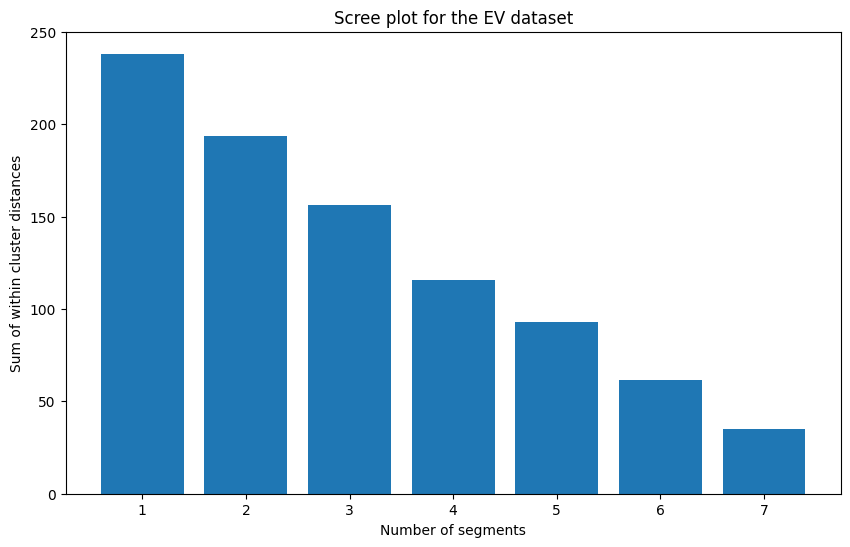

In [ ]:

# plotting scree plot
plt.figure(figsize=(10,6))
plt.bar(range(1,len(inertia)+1), inertia)
plt.title('Scree plot for the EV dataset')
plt.ylabel('Sum of within cluster distances')
plt.xlabel('Number of segments')

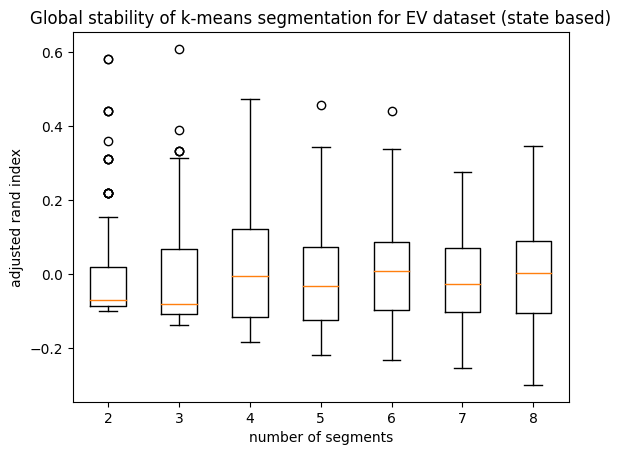

In [ ]:

# Global stability results

# applying bootstrapping
n_bootstraps=100 #n_boot
ARI_scores=[]
for labels in cluster_result:
  ari_boot=[]
  for _ in range(n_bootstraps):
    random_sample=np.random.choice(labels, size=len(labels), replace=True)
    ari = adjusted_rand_score(labels, random_sample)
    ari_boot.append(ari)
  ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2,9))
plt.xlabel('number of segments')
plt.ylabel('adjusted rand index')
plt.title('Global stability of k-means segmentation for EV dataset (state based)')
plt.show()

In [ ]:
# Elbow Method: Find optimal number of clusters
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Check for 2 to 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Inertia for Elbow Method

    # Compute Silhouette Score
    cluster_labels = kmeans.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

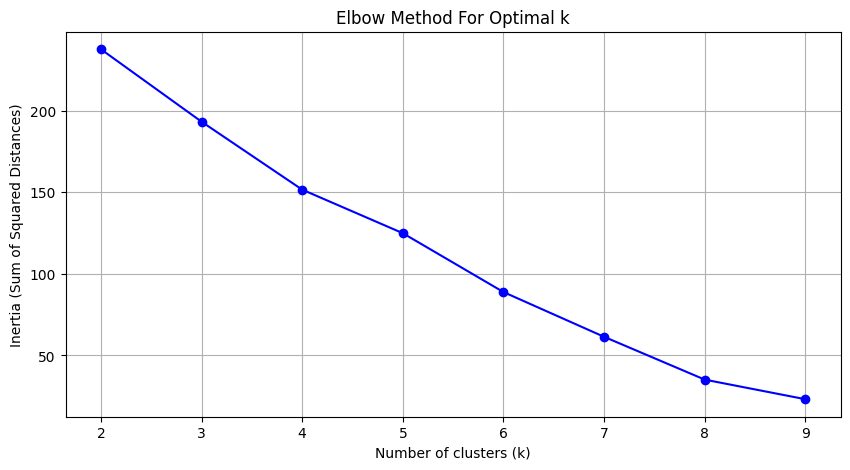

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

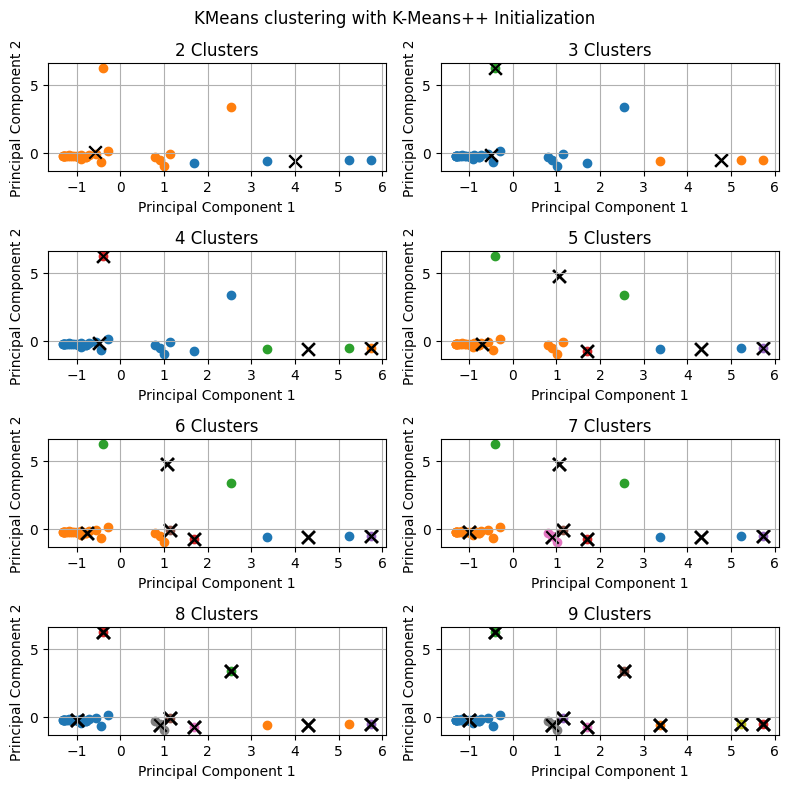

In [ ]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 8)
fig, axes = plt.subplots(4, 2, figsize=(8, 8))  # Adjust figsize for more plots

# Assuming pca_statewise is your data after PCA transformation

for i, num_clusters in enumerate(cluster_range):
    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=10, init='k-means++')
    labels = kmeans.fit_predict(pca_statewise)

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
        cluster_data = pca_statewise[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with K-Means++ Initialization')
plt.tight_layout()
plt.show()

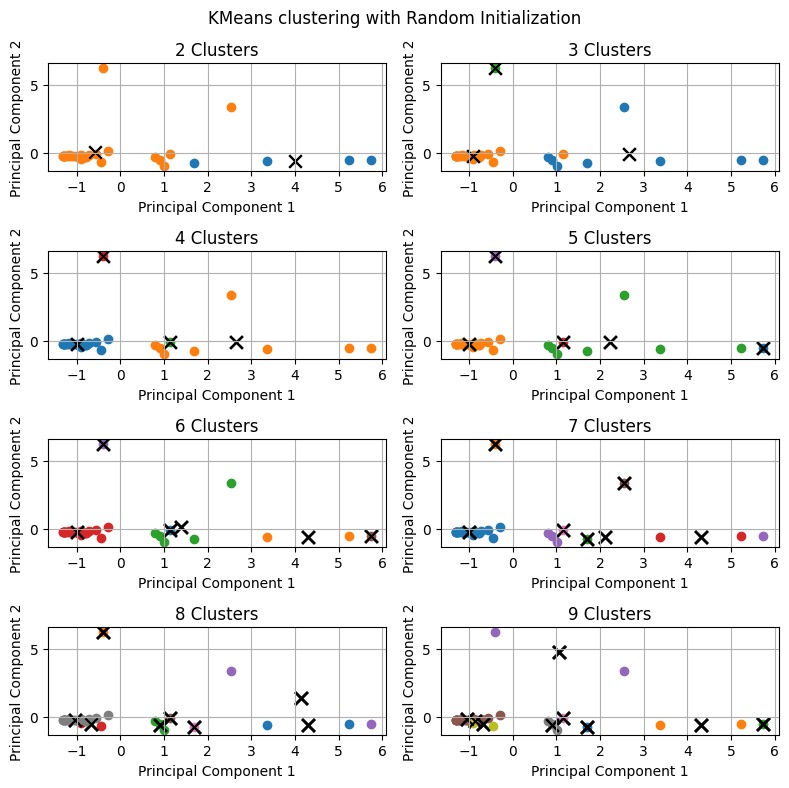

In [ ]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 8)
fig, axes = plt.subplots(4, 2, figsize=(8, 8))  # Adjust figsize for more plots

# Assuming pca_statewise is your data after PCA transformation

for i, num_clusters in enumerate(cluster_range):
    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=10, init='random')
    labels = kmeans.fit_predict(pca_statewise)

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
        cluster_data = pca_statewise[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with Random Initialization')
plt.tight_layout()
plt.show()

Based on the visualization with varying cluster numbers, it appears that selecting 3 clusters yields the most reasonable segmentation of the data. The analysis suggests that opting for 3 clusters with random initialization would likely provide the most meaningful segmentation of the data compared to other cluster numbers and initialization methods considered.

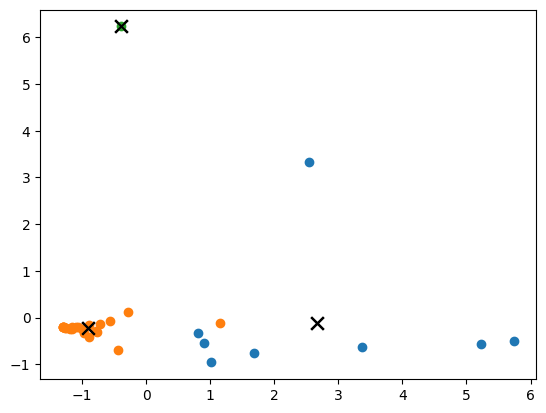

In [ ]:
# Perform kmeans clustering with cluster number 3 and random initialization
kmeans = KMeans(n_clusters=3, random_state=1234, n_init=10, init='random')
labels = kmeans.fit_predict(pca_statewise)

for clus_num in range(3):
  # plotting clusters
  cluster_data=pca_statewise[labels==clus_num]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1])

  # plotting cluster centres
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

In [ ]:

# merging cluster labels to the original dataset
cluster_labels=pd.Series(labels)
ev['cluster-labels']=cluster_labels
ev.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,cluster-labels
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,0.0,1
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,0.0,1
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0,1
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0,1
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0,1


In [ ]:
cols=['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations']
ev.groupby(['cluster-labels','State Name'])[cols].sum()

Two Wheeler  \
cluster-labels State Name                                              
0              Delhi                                           14730   
               Karnataka                                       56737   
               Kerala                                          10299   
               Maharashtra                                     51149   
               Rajasthan                                       23446   
               Tamil Nadu                                      44302   
               Uttar Pradesh                                   18295   
               West Bengal                                      2540   
1              Andaman and Nicobar Island                          1   
               Arunachal Pradesh                                  14   
               Assam                                             721   
               Bihar                                            5003   
               Chandigarh                                        298   
               Dadra and Nagar Haveli and Daman and Diu           69   
               Goa                                              1314   
               Gujarat                                         13662   
               Haryana                                          7777   
               Himachal Pradesh                                  368   
               Jammu and Kashmir                                1417   
               Jharkhand                                        2961   
               Ladakh                                             12   
               Manipur                                            86   
               Meghalaya                                          16   
               Mizoram                                             9   
               Nagaland                                           44   
               Odisha                                          10329   
               Puducherry                                       1429   
               Punjab                                           6408   
               Sikkim                                              1   
               Tripura                                            67   
               Uttarakhand                                      2614   
2              Chhattisgarh                                     6424   

                                                         Three Wheeler  \
cluster-labels State Name                                                
0              Delhi                                          112831.0   
               Karnataka                                       16478.0   
               Kerala                                           2115.0   
               Maharashtra                                      6155.0   
               Rajasthan                                       29631.0   
               Tamil Nadu                                       4470.0   
               Uttar Pradesh                                  257159.0   
               West Bengal                                     40948.0   
1              Andaman and Nicobar Island                         30.0   
               Arunachal Pradesh                                   0.0   
               Assam                                           47041.0   
               Bihar                                           59079.0   
               Chandigarh                                       1410.0   
               Dadra and Nagar Haveli and Daman and Diu           36.0   
               Goa                                                28.0   
               Gujarat                                          1869.0   
               Haryana                                         18595.0   
               Himachal Pradesh                                  167.0   
               Jammu and Kashmir                                  43.0   
               Jharkhand                              

<Axes: xlabel='cluster-labels'>

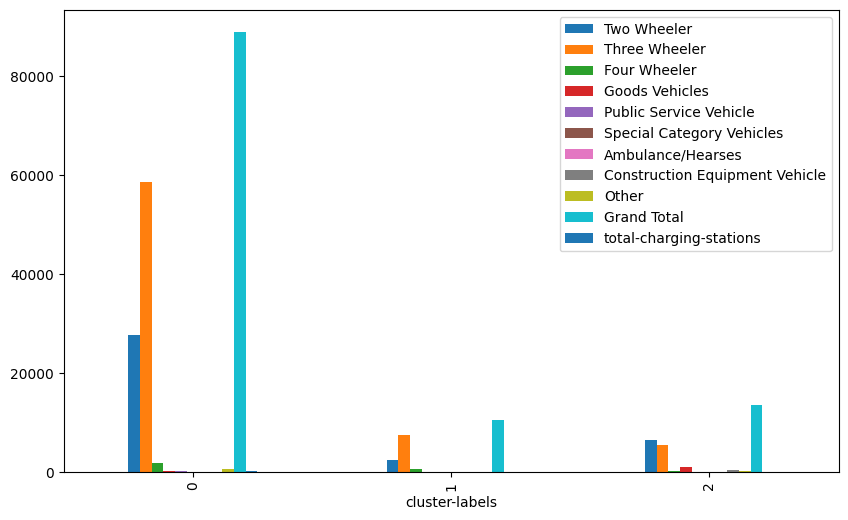

In [ ]:
ev.groupby('cluster-labels').mean(numeric_only=True).plot(kind='bar', figsize=(10,6))

Cluster 0: Diverse Market with Balanced Vehicle Distribution

1. Characterized by a balanced distribution of two-wheelers and three-wheelers, with a slightly higher presence of two-wheelers.
2. Mean values fall between those of the other clusters, indicating moderate usage levels across vehicle categories.
3. Notable presence of goods vehicles alongside two-wheelers and three-wheelers, reflecting a diverse market composition.

Cluster 1: Dominant Two-Wheeler and Three-Wheeler Market

1. Represents the highest values across all vehicle categories, indicating a market dominated by two-wheelers and three-wheelers.
2. More three-wheelers than two-wheelers, with a significant number of both vehicle types present.
3. Noteworthy presence of four-wheelers alongside two-wheelers and three-wheelers, suggesting a diverse mix of vehicles.

Cluster 2: Small-Scale Market with Focus on Three-Wheelers

1. Characterized by the lowest values across all vehicle categories, indicating a smaller-scale market compared to other clusters.
2. More three-wheelers than two-wheelers, with relatively fewer vehicles overall compared to other clusters.